In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\! 4Geeks\\proyecto_kaggle_bank_dataset\\kaggle_project\\data\\train.csv")
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df = df.drop("id", axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [10]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(f"Tipo de dato: {df[col].dtype}")
    print(f"Valores únicos: {df[col].nunique()}")
    
    if df[col].dtype == 'object':
        print(df[col].value_counts().head(5))  # top 5 categorías
    else:
        print(df[col].describe())
    
    # Constante o cuasi-constante
    freq = df[col].value_counts(normalize=True).iloc[0]
    if freq > 0.95:
        print(f"⚠ {col} es constante o cuasi-constante ({freq*100:.2f}% mismo valor)")



--- age ---
Tipo de dato: int64
Valores únicos: 78
count    750000.000000
mean         40.926395
std          10.098829
min          18.000000
25%          33.000000
50%          39.000000
75%          48.000000
max          95.000000
Name: age, dtype: float64

--- job ---
Tipo de dato: object
Valores únicos: 12
job
management     175541
blue-collar    170498
technician     138107
admin.          81492
services        64209
Name: count, dtype: int64

--- marital ---
Tipo de dato: object
Valores únicos: 3
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

--- education ---
Tipo de dato: object
Valores únicos: 4
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

--- default ---
Tipo de dato: object
Valores únicos: 2
default
no     737151
yes     12849
Name: count, dtype: int64
⚠ default es constante o cuasi-constante (98.29% mismo valor)

--- balance ---
Tipo de dato: int64
Valores

In [30]:
df["month"].unique()

array(['aug', 'jun', 'may', 'feb', 'apr', 'nov', 'jul', 'jan', 'oct',
       'mar', 'sep', 'dec'], dtype=object)

In [31]:
map_months = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov":11, "dec": 12
}

df["month"] = df["month"].str.lower().map(map_months)
df["month"].unique()

array([ 8,  6,  5,  2,  4, 11,  7,  1, 10,  3,  9, 12])

In [21]:
# Variables numericas
num_vars = ["age", "balance", "day", "month", "duration", "campaign", "pdays", "previous"]

# Variables categoricas
cat_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "y"]

### Analisis grafico para variables numericas

In [18]:
def num_data_plt(num_var, target="y", data=df):
    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    sns.histplot(df[num_var], kde=True)
    plt.title(f"Distribucion de {num_var}")

    plt.subplot(1,3,2)
    sns.boxplot(x=df[num_var])
    plt.title(f"Boxplot de {num_var}")

    plt.subplot(1,3,3)
    sns.violinplot(x=target, y=num_var, data=data)
    plt.title(f"Distribución de {num_var} según respuesta ({target})")
    
    plt.tight_layout()
    plt.show()

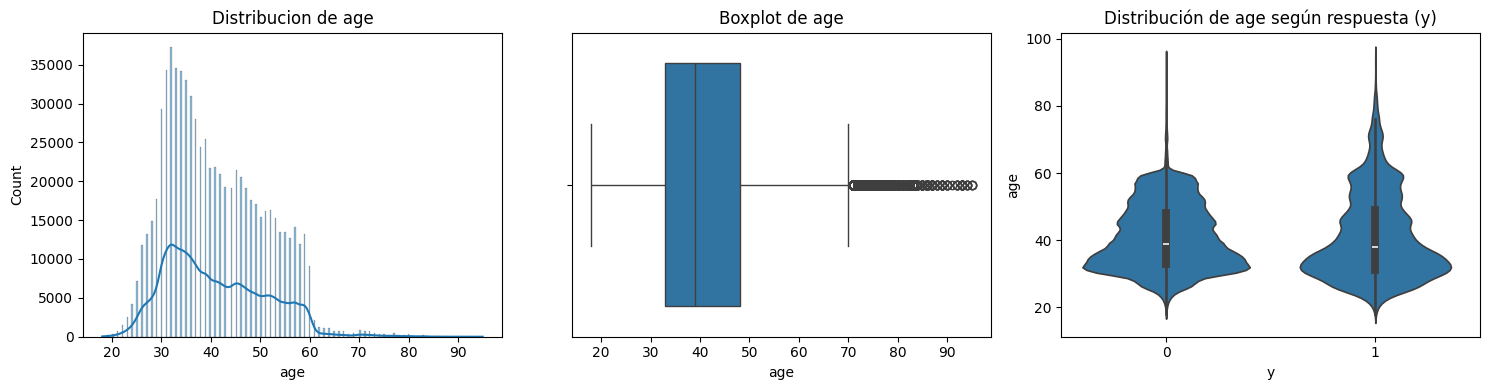

In [19]:
num_data_plt("age")

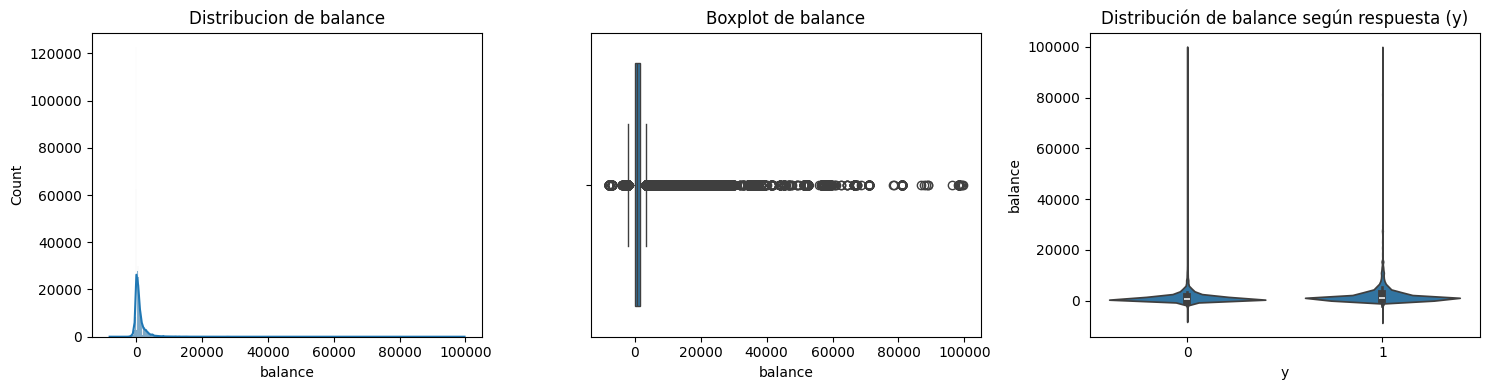

In [23]:
num_data_plt("balance")

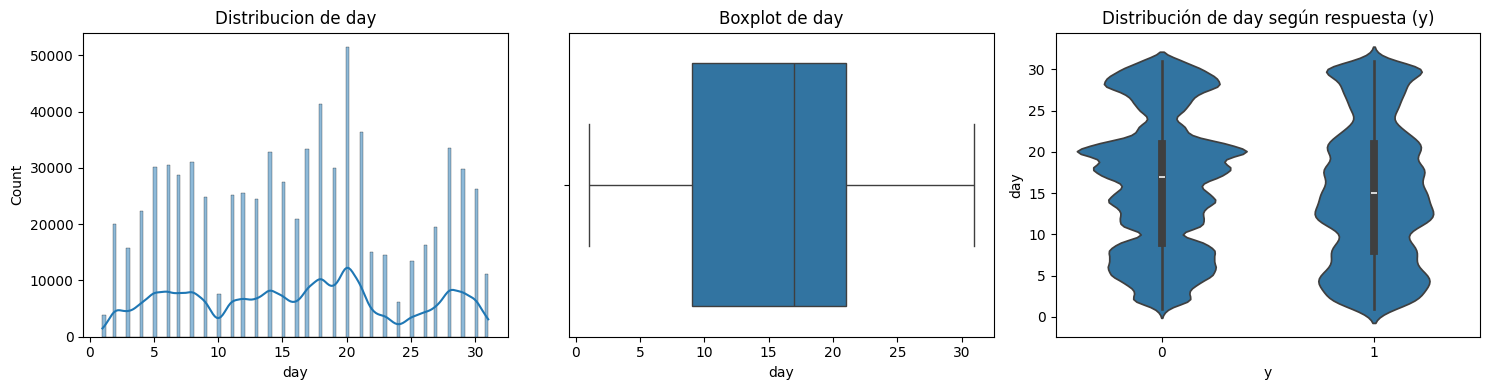

In [24]:
num_data_plt("day")

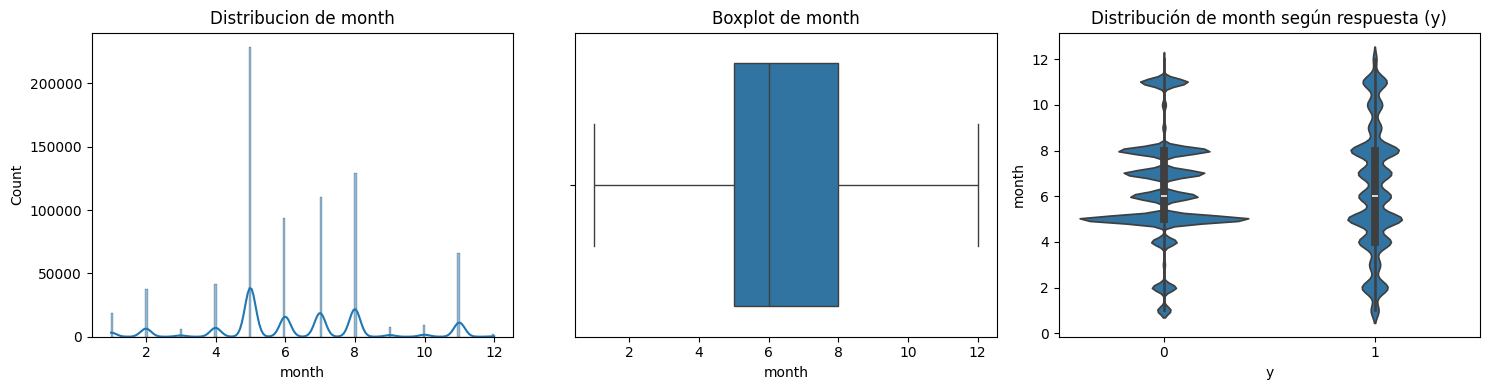

In [32]:
num_data_plt("month")

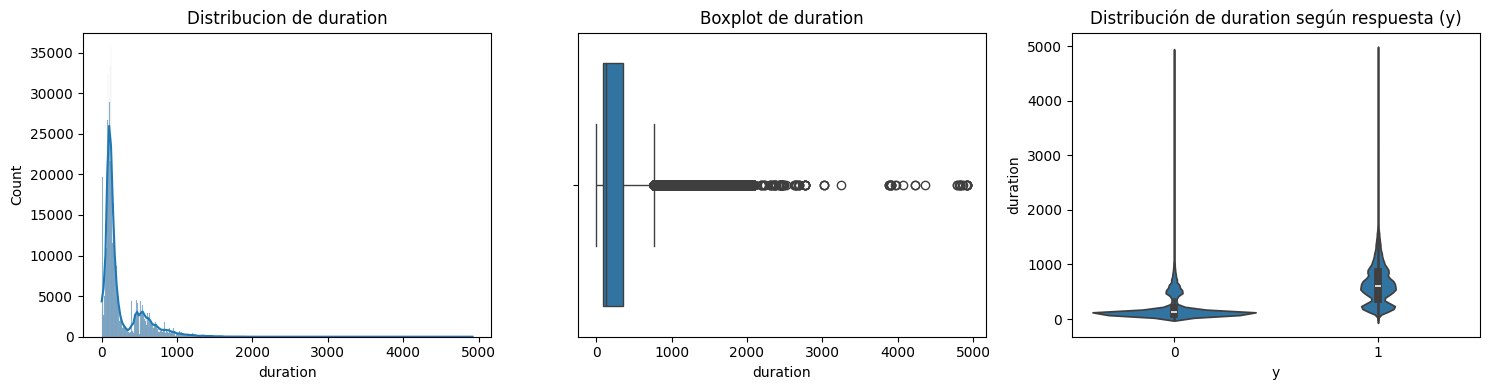

In [33]:
num_data_plt("duration")

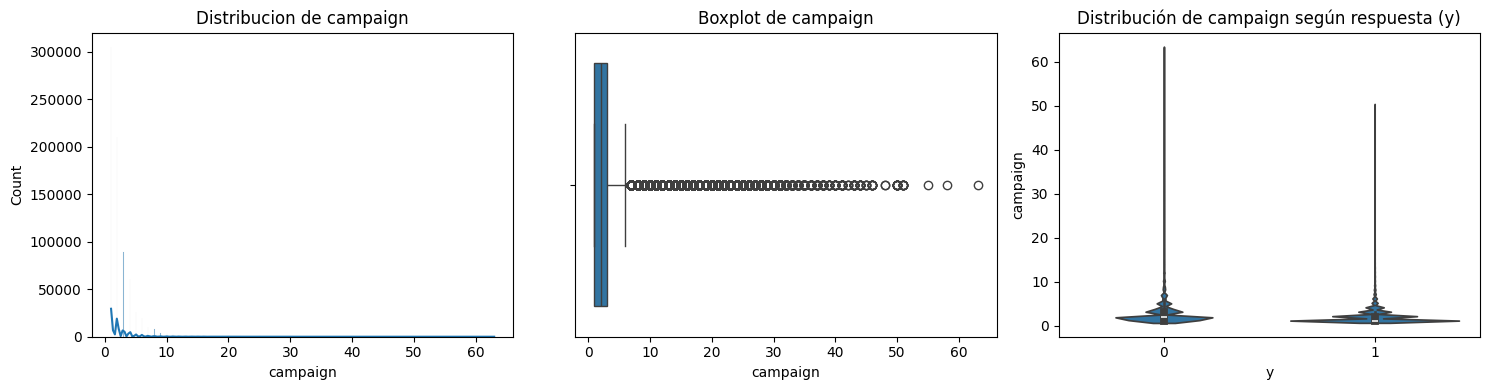

In [34]:
num_data_plt("campaign")

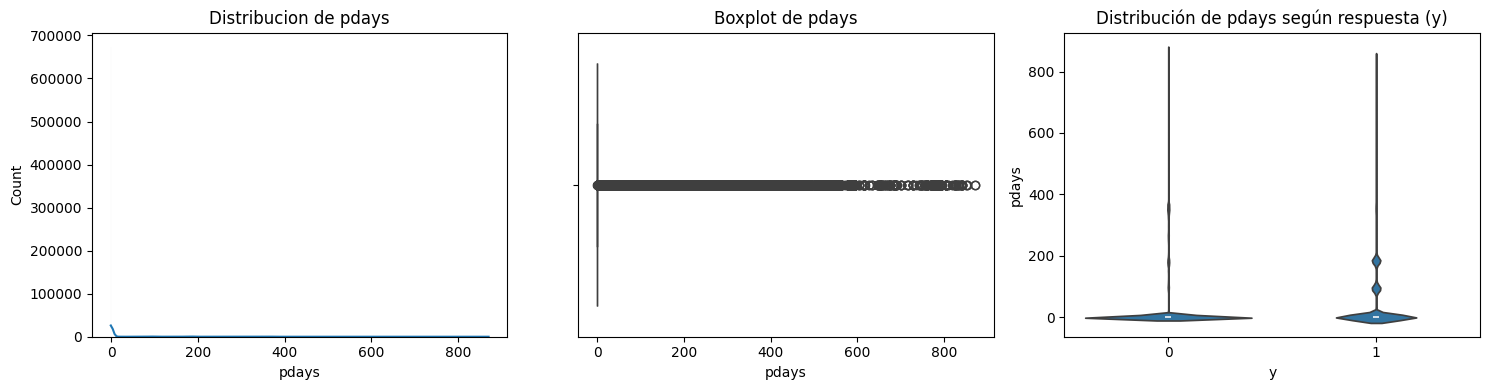

In [35]:
num_data_plt("pdays")

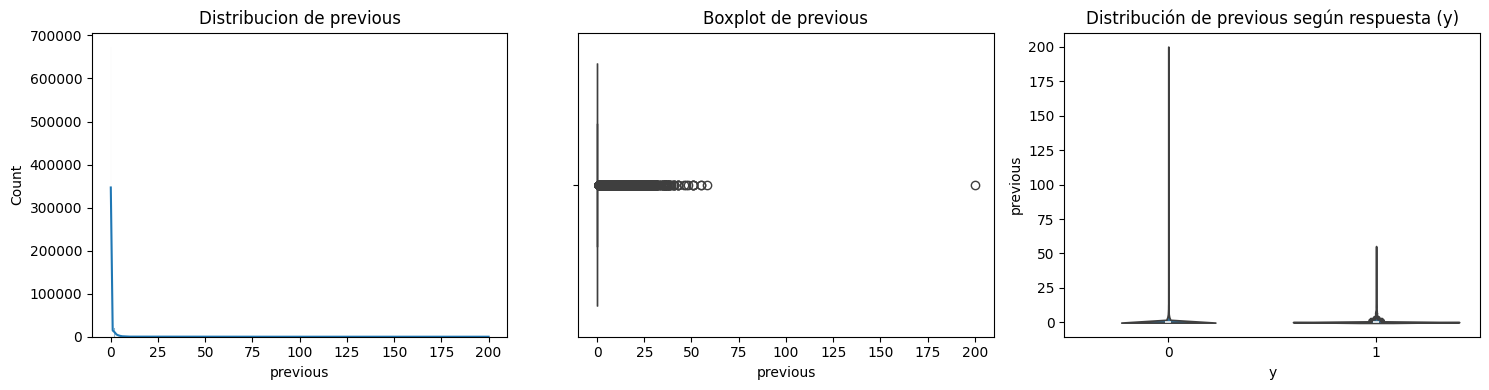

In [36]:
num_data_plt("previous")

In [ ]:
def cat_data_plt(cat_var, target="y", data=df):
    

In [22]:
num_vars

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']